
Assignment 13: Generative AI *Essentials*

In [17]:
!pip install -q transformers torch datasets tensorflow matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 981.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.3 MB/s eta 0:00:00


In [21]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from datasets import load_dataset
import requests

In [22]:
# Now Download the Dataset

url = "https://www.gutenberg.org/files/11/11-0.txt"
r = requests.get(url)
text = r.text

# Extract main content (trim header/footer)
start = text.find("CHAPTER I")
end = text.find("THE END")
text = text[start:end]

print("Text length:", len(text))
print(text[:500])


Text length: 144474
CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole





### GPT‑2 Overview
- Transformer-based autoregressive model
- Uses multi-head self-attention & feed-forward layers
- Trained on vast corpora, generates token-by-token predictions
- Byte-Pair Encoding (BPE) for tokenization


In [23]:
#  Load GPT‑2 Model & Tokenizer

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name, pad_token_id=tokenizer.eos_token_id)
model.eval()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [24]:
#  Define Text Generation Function

def generate_text(prompt, max_length=100, temperature=1.0, top_k=50, top_p=0.9):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(
            input_ids,
            do_sample=True,
            max_length=max_length,
            temperature=temperature,
            top_k=top_k,
            top_p=top_p,
            pad_token_id=tokenizer.eos_token_id
        )
    return tokenizer.decode(output[0], skip_special_tokens=True)


In [25]:
#  Experiment with Parameters

print("Basic:\n", generate_text("Once upon a time", max_length=50))
print("Length=30:\n", generate_text("Once upon a time", max_length=30))
print("High Temp:\n", generate_text("The future of AI is", temperature=1.5))
print("Low Temp:\n", generate_text("The future of AI is", temperature=0.3))
print("Top‑k small:\n", generate_text("In a world ruled by robots,", top_k=5, top_p=0.5))


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Basic:
 Once upon a time I was in a great deal of trouble. One thing I'd like to say to you is that your family, at the moment, is doing fine. I love you," he said. "I hope the rest of your family
Length=30:
 Once upon a time, the man had not a soul, nor was he not in the habit of being in the habit of being evil. In fact
High Temp:
 The future of AI is as interesting as it is exciting - both for the user and the technology industry at large."

I think that the current hype in AI is overhyped and undervalided given we have still very little proof from which to conclude a definitive conclusion. For now, the "most promising, new applications are very important in this context" continues, despite AI's impressive progress to the current, far longer timeframe. I believe AI could do things that many scientists and researchers consider
Low Temp:
 The future of AI is in the hands of the people.

The future of AI is in the hands of the people.

The future of AI is in the hands of the people.

T

In [26]:
# Application Demonstration: Content Writing Assistant

prompt = "You are a creative writing assistant. Write an intro paragraph about sustainable fashion:"
print(generate_text(prompt, max_length=120, temperature=0.8))


You are a creative writing assistant. Write an intro paragraph about sustainable fashion: how to use your creative talents to create new and unique products and experiences.

Create your own brand. Write a unique personal style. Write a unique style guide. Write a unique style guide.

Make a difference. You can get away with all of these and many more.

Make an impact. You can make a difference.

Make a difference. You can make a difference.

Make a difference. You can make a difference.

Make a difference. You can make a difference


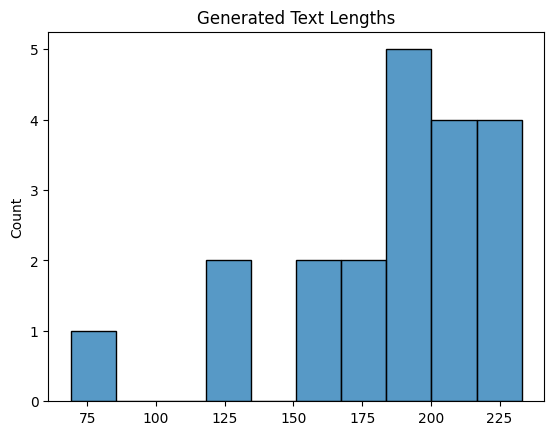

In [27]:
# Analysis: Generated Text Length Distribution

lengths = [len(generate_text("Hello", max_length=50)) for _ in range(20)]
sns.histplot(lengths, bins=10)
plt.title("Generated Text Lengths")
plt.show()


### Ethical Summary

- **Bias**: GPT‑2 can reflect societal bias.
- **Misinformation**: Text may appear factual but be inaccurate.
- **Job Impact**: Risks automation in creative sectors.

**Mitigations**:
1. Use balanced and curated training data.
2. Add human review and fact-checking.
3. Provide transparency in model usage.


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
!cp "/content/drive/MyDrive/Colab Notebooks/Assignment 13: Generative AI Essentials.ipynb" /content/
!ls /content

'Assignment 13: Generative AI Essentials.ipynb'   drive   sample_data
